# Import Modules

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import Data

In [ ]:
claim = pd.read_excel('/content/data.xlsx')
claim

,Period,Claim
0,2019_1,8.395000
1,2019_2,11.130000
2,2019_3,9.417500
3,2019_4,11.910000
4,2019_5,10.360000
5,2019_6,10.065000
6,2019_7,5.839000
7,2019_8,3.610000
8,2019_9,3.140000
9,2019_10,6.163000


In [ ]:
# Ekstrak data
x_new = claim['Claim']
time_new = claim['Period']
x_new.shape

(59,)

In [ ]:
newData = pd.DataFrame(x_new, columns=['Claim'])
newData['Period'] = time_new

newData.to_excel('/content/data baru.xlsx', index=False)

## Pengecekan missing value

Jumlah missing value 
 Claim     0
Period    0
dtype: int64


<Figure size 1000x600 with 0 Axes>

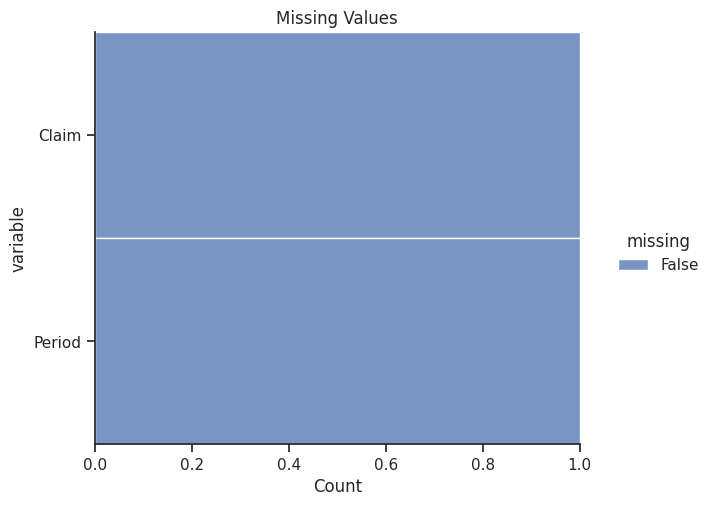

In [ ]:
# Pengecekan missing value

sns.set_theme(style="ticks")
print('Jumlah missing value \n', newData.isna().sum())
plt.figure(figsize=(10,6))
ax = sns.displot(data=newData.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25)
ax.set(title='Missing Values')

## Deskriptif Data

In [ ]:
Claimtahun = newData.copy()
Claimtahun[['Period','Bulan']] = Claimtahun['Period'].str.split('_',expand=True)
Claimtahun = Claimtahun.groupby(['Period'])

In [ ]:
# Mengekstrak tahun dari kolom 'Period'
claim['Year'] = claim['Period'].apply(lambda x: int(str(x).split('_')[0]))

# Mengelompokkan data berdasarkan tahun dan menghitung statistik yang diinginkan
Descriptive = claim.groupby('Year')['Claim'].agg(['mean', 'min', 'max', 'std']).reset_index()

# Membulatkan nilai Descriptive ke 3 desimal
Descriptive = Descriptive.round(decimals=3)

# Mengubah nama kolom menjadi lebih deskriptif
Descriptive.columns = ['Period', 'Mean', 'Min', 'Max', 'Std']

# Menampilkan hasil
print(Descriptive)

   Period    Mean     Min     Max    Std
0    2019   7.759   3.140  11.910  2.929
1    2020   6.277   1.270  12.450  3.152
2    2021  13.210   3.143  29.123  7.851
3    2022  15.837   5.280  24.184  5.142
4    2023  22.493  10.099  32.048  7.982


In [ ]:
Descriptive.to_excel('/content/summary data.xlsx', index=False)

## Visualisasi Data

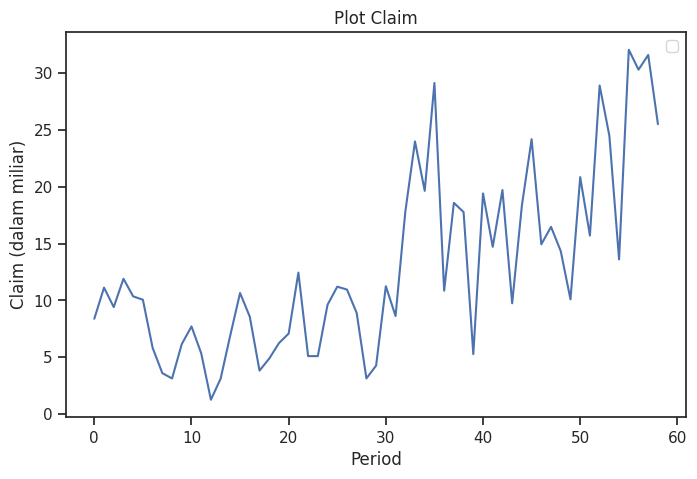

In [ ]:
# Plot Data
plt.figure(figsize=(8,5))
plt.plot(x_new.tolist())
plt.ylabel('Claim (dalam miliar)')
plt.xlabel('Period')
plt.title('Plot Claim')
plt.legend()
plt.show()

## Pengecekan Stasioneritas Data

In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#perform augmented Dickey-Fuller test
adfTest = adfuller(x_new)
print("ADF Test")
print("Test statistic = ", round(adfTest[0],3))
print("P-value = ", round(adfTest[1],3)) # tidak stasioner
print("Lag = ", round(adfTest[2],3))
print("Number of observations = ", round(adfTest[3],3))

ADF Test
Test statistic =  -0.263
P-value =  0.931
Lag =  4
Number of observations =  54


# Split Dataset

In [ ]:
# Define the split time
split_time = int(len(x_new)*0.7)
split_time

41

In [ ]:
# Get the train set
time_train = time_new[:split_time]
x_train = x_new[:split_time]

# Get the test set
time_test = time_new[split_time:]
x_test = x_new[split_time:]

In [ ]:
print("Rentang awal data latih: ", time_train[0])
print("Rentang akhir data latih: ", time_train[0+40])

Rentang awal data latih:  2019_1
Rentang akhir data latih:  2022_5


In [ ]:
print("Rentang awal data uji: ", time_test[0+41])
print("Rentang akhir data uji: ", time_test[0+41+17])

Rentang awal data uji:  2022_6
Rentang akhir data uji:  2023_11


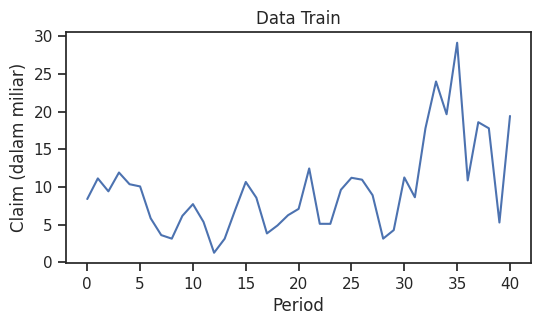

In [ ]:
# Plot Data Train
plt.figure(figsize=(6,3))
plt.plot(x_train.tolist())
plt.ylabel('Claim (dalam miliar)')
plt.xlabel('Period')
plt.title('Data Train')
plt.show()

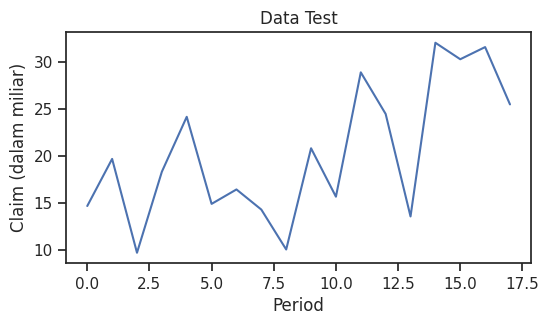

In [ ]:
# Plot Data Test
plt.figure(figsize=(6,3))
plt.plot(x_test.tolist())
plt.ylabel('Claim (dalam miliar)')
plt.xlabel('Period')
plt.title('Data Test')
plt.show()

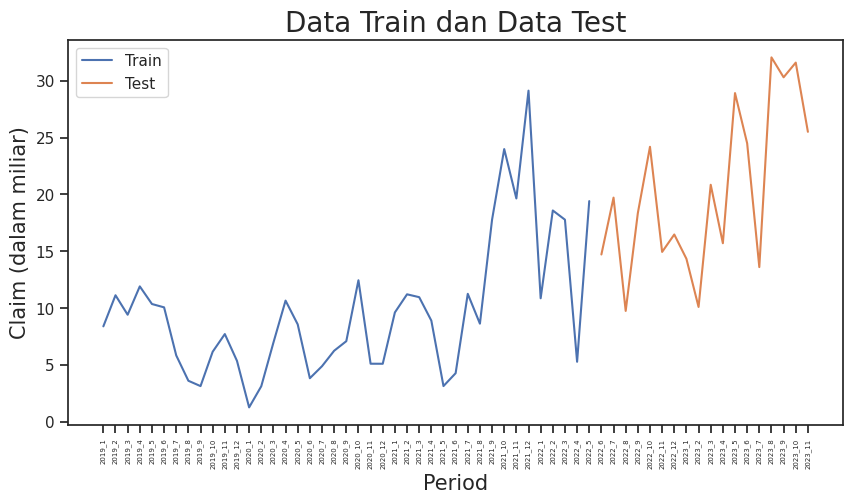

In [ ]:
# Plot the train and test data

plt.figure(figsize=(10,5))
plt.plot(time_train, x_train, label = 'Train')
plt.plot(time_test, x_test, label = 'Test')
plt.xticks(rotation=90,fontsize=5)
plt.xlabel('Period', size=15)
plt.ylabel('Claim (dalam miliar)', size=15)
plt.title('Data Train dan Data Test', size=20)
plt.legend()
plt.show()

# Persiapan pembentukan model

In [ ]:
# Persiapan fitur dan label untuk RNN dan LSTM
window_size = 10
batch_size = 20
shuffle_buffer_size = 1000

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [ ]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [ ]:
# Print shapes of feature and label
for window in dataset.take(1):
  print(f'shape of feature: {window[0].shape}')
  print(f'shape of label: {window[1].shape}')

shape of feature: (20, 10)
shape of label: (20,)


# Prepare for tune the learning rate

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(90) / 20))

# LSTM

## Define the Callbacks

In [ ]:
class myCallback_LSTM(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Check the validation set MAE
    if(logs.get('val_mae') < 2.1):

      # Stop if threshold is met
      print("\nRequired val MAE is met so cancelling training!")
      self.model.stop_training = True

# Instantiate the class
callbacks_LSTM = myCallback_LSTM()

## Define the Forecast Series

In [ ]:
# Reduce the original series
forecast_series_LSTM = x_new[split_time-window_size:-1]

In [ ]:
def forecast_LSTM(model, series, window_size, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    dataset = dataset.batch(batch_size).prefetch(1)
    forecast = model.predict(dataset)
    return forecast

## 1 Hidden Layer

### Build The Model

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
LSTM_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[window_size, 1]),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

# Print the model summary
LSTM_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 64)            256       
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda (Lambda)             (None, 1)                 0         
                                                                 
Total params: 33345 (130.25 KB)
Trainable params: 33345 (130.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Tune the Learning rate

In [ ]:
# Get initial weights
init_weights_LSTM_1 = LSTM_1.get_weights()

In [ ]:
# Initialize the optimizer
optimizer_ = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
LSTM_1.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer_)

# Train the model
history_LSTM_1 = LSTM_1.fit(dataset, epochs=90, callbacks=[lr_schedule])

Epoch 1/90
2/2 [==============================] - 2s 41ms/step - loss: 89.4447 - lr: 1.0000e-08
Epoch 2/90
2/2 [==============================] - 0s 12ms/step - loss: 89.1027 - lr: 1.1220e-08
Epoch 3/90
2/2 [==============================] - 0s 12ms/step - loss: 88.4201 - lr: 1.2589e-08
Epoch 4/90
2/2 [==============================] - 0s 12ms/step - loss: 87.4004 - lr: 1.4125e-08
Epoch 5/90
2/2 [==============================] - 0s 12ms/step - loss: 86.0546 - lr: 1.5849e-08
Epoch 6/90
2/2 [==============================] - 0s 12ms/step - loss: 84.4067 - lr: 1.7783e-08
Epoch 7/90
2/2 [==============================] - 0s 12ms/step - loss: 82.3947 - lr: 1.9953e-08
Epoch 8/90
2/2 [==============================] - 0s 13ms/step - loss: 80.0183 - lr: 2.2387e-08
Epoch 9/90
2/2 [==============================] - 0s 12ms/step - loss: 77.2792 - lr: 2.5119e-08
Epoch 10/90
2/2 [==============================] - 0s 12ms/step - loss: 74.1209 - lr: 2.8184e-08
Epoch 11/90
2/2 [======================

Text(0.5, 1.0, 'Plot Loss vs Learning Rate Model LSTM_1')

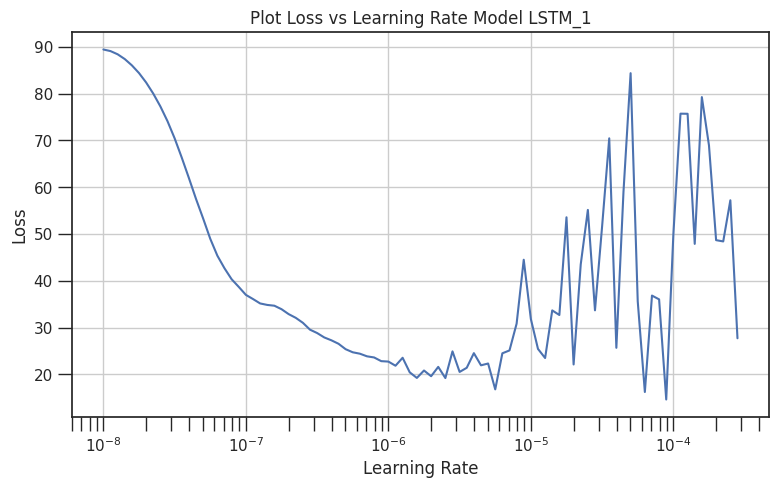

In [ ]:
# Pick optimal learning rate

# Set the figure size
plt.figure(figsize=(9, 5))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history_LSTM_1.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

plt.ylabel('Loss')
plt.xlabel('Learning Rate')
plt.title('Plot Loss vs Learning Rate Model LSTM_1')

### Training the Model

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
LSTM_1.set_weights(init_weights_LSTM_1)

In [ ]:
# Generate data windows from the validation set
val_set = windowed_dataset(x_test, window_size, batch_size, shuffle_buffer_size)

# Set the learning rate
lrs_LSTM_1 = 5.0119e-05

# Set the optimizer
optimizer_LSTM_1 = tf.keras.optimizers.SGD(learning_rate=lrs_LSTM_1, momentum=0.9)

# Set the training parameters
LSTM_1.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer_LSTM_1,
              metrics=["mae"])

# Train the model
history_LSTM_1 = LSTM_1.fit(dataset, epochs=500, validation_data=val_set, callbacks=[callbacks_LSTM])

Epoch 1/500
2/2 [==============================] - 3s 602ms/step - loss: 81.7984 - mae: 82.2830 - val_loss: 65.5348 - val_mae: 66.0348
Epoch 2/500
2/2 [==============================] - 0s 89ms/step - loss: 84.8476 - mae: 85.3476 - val_loss: 138.0477 - val_mae: 138.5477
Epoch 3/500
2/2 [==============================] - 0s 53ms/step - loss: 97.3284 - mae: 97.8233 - val_loss: 176.2584 - val_mae: 176.7584
Epoch 4/500
2/2 [==============================] - 0s 100ms/step - loss: 122.7493 - mae: 123.2493 - val_loss: 39.2268 - val_mae: 39.7268
Epoch 5/500
2/2 [==============================] - 0s 66ms/step - loss: 34.1788 - mae: 34.6783 - val_loss: 20.7954 - val_mae: 21.2954
Epoch 6/500
2/2 [==============================] - 0s 95ms/step - loss: 55.6343 - mae: 56.1343 - val_loss: 25.0374 - val_mae: 25.5374
Epoch 7/500
2/2 [==============================] - 0s 98ms/step - loss: 56.3247 - mae: 56.8247 - val_loss: 142.5891 - val_mae: 143.0891
Epoch 8/500
2/2 [==============================] - 0

### Model Prediction

In [ ]:
# Use helper function to generate predictions
forecast_LSTM_1 = forecast_LSTM(LSTM_1, forecast_series_LSTM, window_size, batch_size)

# Drop single dimensional axes
results_LSTM_1 = forecast_LSTM_1.squeeze()

1/1 [==============================] - 0s 464ms/step


In [ ]:
print(results_LSTM_1.min())
print(results_LSTM_1.max())

6.685704
11.571727


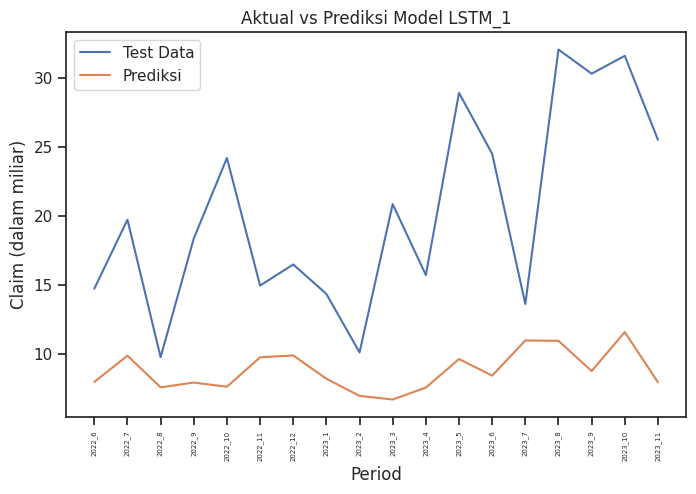

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(time_test, x_test, label = 'Test Data')
plt.plot(time_test,results_LSTM_1, label = 'Prediksi')
plt.title('Aktual vs Prediksi Model LSTM_1')
plt.xlabel('Period')
plt.ylabel('Claim (dalam miliar)')
plt.xticks(rotation=90,fontsize=5)
plt.legend()
plt.show()

### Evaluation Metrics

In [ ]:
print("Test MAPE: %.3f" % (tf.keras.metrics.mean_absolute_percentage_error(x_test, results_LSTM_1).numpy()*100))
print("Test MAE: %.3f" % tf.keras.metrics.mean_absolute_error(x_test, results_LSTM_1).numpy())
print("Test MSE: %.3f" % tf.keras.metrics.mean_squared_error(x_test, results_LSTM_1).numpy())
print("Test RMSE: %.3f" % np.sqrt(tf.keras.metrics.mean_squared_error(x_test, results_LSTM_1).numpy()))

Test MAPE: 5186.136
Test MAE: 11.526
Test MSE: 176.293
Test RMSE: 13.278


## 2 Hidden Layer

### Build The Model

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
LSTM_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[window_size, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

# Print the model summary
LSTM_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 64)            256       
                                                                 
 lstm (LSTM)                 (None, 10, 64)            33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda (Lambda)             (None, 1)                 0         
                                                                 
Total params: 66369 (259.25 KB)
Trainable params: 66369 (259.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Tune the Learning rate

In [ ]:
# Get initial weights
init_weights_LSTM_2 = LSTM_2.get_weights()

In [ ]:
# Initialize the optimizer
optimizer_ = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
LSTM_2.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer_)

# Train the model
history_LSTM_2 = LSTM_2.fit(dataset, epochs=90, callbacks=[lr_schedule])

Epoch 1/90
2/2 [==============================] - 5s 51ms/step - loss: 148.9615 - lr: 1.0000e-08
Epoch 2/90
2/2 [==============================] - 0s 15ms/step - loss: 148.7630 - lr: 1.1220e-08
Epoch 3/90
2/2 [==============================] - 0s 21ms/step - loss: 148.3707 - lr: 1.2589e-08
Epoch 4/90
2/2 [==============================] - 0s 17ms/step - loss: 147.7937 - lr: 1.4125e-08
Epoch 5/90
2/2 [==============================] - 0s 16ms/step - loss: 147.0211 - lr: 1.5849e-08
Epoch 6/90
2/2 [==============================] - 0s 17ms/step - loss: 146.0824 - lr: 1.7783e-08
Epoch 7/90
2/2 [==============================] - 0s 19ms/step - loss: 144.9349 - lr: 1.9953e-08
Epoch 8/90
2/2 [==============================] - 0s 17ms/step - loss: 143.6256 - lr: 2.2387e-08
Epoch 9/90
2/2 [==============================] - 0s 20ms/step - loss: 142.0807 - lr: 2.5119e-08
Epoch 10/90
2/2 [==============================] - 0s 17ms/step - loss: 140.3194 - lr: 2.8184e-08
Epoch 11/90
2/2 [============

Text(0.5, 1.0, 'Plot Loss vs Learning Rate Model LSTM_2')

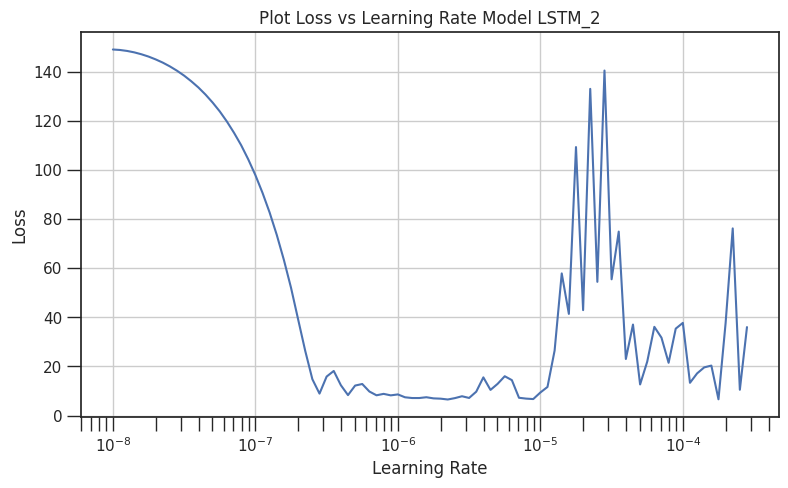

In [ ]:
# Pick optimal learning rate

# Set the figure size
plt.figure(figsize=(9, 5))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history_LSTM_2.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

plt.ylabel('Loss')
plt.xlabel('Learning Rate')
plt.title('Plot Loss vs Learning Rate Model LSTM_2')

### Training the Model

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
LSTM_2.set_weights(init_weights_LSTM_2)

In [ ]:
# Set the learning rate
lrs_LSTM_2 = 2.8184e-05

# Set the optimizer
optimizer_LSTM_2 = tf.keras.optimizers.SGD(learning_rate=lrs_LSTM_2, momentum=0.9)

# Set the training parameters
LSTM_2.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer_LSTM_2,
              metrics=["mae"])

# Train the model
history_LSTM_2 = LSTM_2.fit(dataset, epochs=500, validation_data=val_set, callbacks=[callbacks_LSTM])

Epoch 1/500
2/2 [==============================] - 5s 982ms/step - loss: 98.9600 - mae: 99.4600 - val_loss: 266.7919 - val_mae: 267.2919
Epoch 2/500
2/2 [==============================] - 0s 41ms/step - loss: 170.6995 - mae: 171.1995 - val_loss: 86.0234 - val_mae: 86.5234
Epoch 3/500
2/2 [==============================] - 0s 41ms/step - loss: 75.6695 - mae: 76.1695 - val_loss: 129.9704 - val_mae: 130.4704
Epoch 4/500
2/2 [==============================] - 0s 41ms/step - loss: 114.1634 - mae: 114.6634 - val_loss: 59.4058 - val_mae: 59.9058
Epoch 5/500
2/2 [==============================] - 0s 45ms/step - loss: 38.8427 - mae: 39.3427 - val_loss: 38.2015 - val_mae: 38.7015
Epoch 6/500
2/2 [==============================] - 0s 49ms/step - loss: 33.0169 - mae: 33.5169 - val_loss: 80.8572 - val_mae: 81.3572
Epoch 7/500
2/2 [==============================] - 0s 41ms/step - loss: 81.3555 - mae: 81.8555 - val_loss: 24.5014 - val_mae: 25.0014
Epoch 8/500
2/2 [==============================] - 0s

### Model Prediction

In [ ]:
# Use helper function to generate predictions
forecast_LSTM_2 = forecast_LSTM(LSTM_2, forecast_series_LSTM, window_size, batch_size)

# Drop single dimensional axes
results_LSTM_2 = forecast_LSTM_2.squeeze()

1/1 [==============================] - 1s 884ms/step


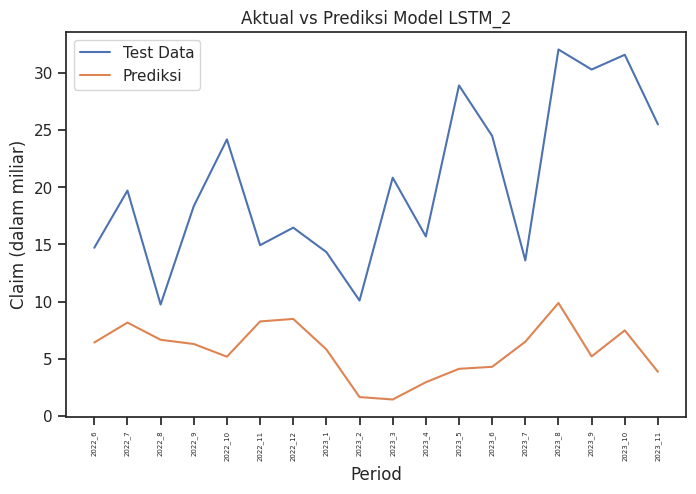

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(time_test, x_test, label = 'Test Data')
plt.plot(time_test,results_LSTM_2, label = 'Prediksi')
plt.title('Aktual vs Prediksi Model LSTM_2')
plt.xlabel('Period')
plt.ylabel('Claim (dalam miliar)')
plt.xticks(rotation=90,fontsize=5)
plt.legend()
plt.show()

### Evaluation Metrics

In [ ]:
print("Test MAPE: %.3f" % (tf.keras.metrics.mean_absolute_percentage_error(x_test, results_LSTM_2).numpy()*100))
print("Test MAE: %.3f" % tf.keras.metrics.mean_absolute_error(x_test, results_LSTM_2).numpy())
print("Test MSE: %.3f" % tf.keras.metrics.mean_squared_error(x_test, results_LSTM_2).numpy())
print("Test RMSE: %.3f" % np.sqrt(tf.keras.metrics.mean_squared_error(x_test, results_LSTM_2).numpy()))

Test MAPE: 6856.724
Test MAE: 14.596
Test MSE: 263.787
Test RMSE: 16.242


## 3 Hidden Layer

### Build The Model

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
LSTM_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[window_size, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

# Print the model summary
LSTM_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 64)            256       
                                                                 
 lstm (LSTM)                 (None, 10, 64)            33024     
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda (Lambda)             (None, 1)                 0         
                                                                 
Total params: 99393 (388.25 KB)
Trainable params: 99393 

### Tune the Learning rate

In [ ]:
# Get initial weights
init_weights_LSTM_3 = LSTM_3.get_weights()

In [ ]:
# Initialize the optimizer
optimizer_ = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
LSTM_3.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer_)

# Train the model
history_LSTM_3 = LSTM_3.fit(dataset, epochs=90, callbacks=[lr_schedule])

Epoch 1/90
2/2 [==============================] - 6s 57ms/step - loss: 13.8569 - lr: 1.0000e-08
Epoch 2/90
2/2 [==============================] - 0s 18ms/step - loss: 13.8085 - lr: 1.1220e-08
Epoch 3/90
2/2 [==============================] - 0s 22ms/step - loss: 13.7120 - lr: 1.2589e-08
Epoch 4/90
2/2 [==============================] - 0s 19ms/step - loss: 13.5679 - lr: 1.4125e-08
Epoch 5/90
2/2 [==============================] - 0s 20ms/step - loss: 13.3792 - lr: 1.5849e-08
Epoch 6/90
2/2 [==============================] - 0s 24ms/step - loss: 13.1444 - lr: 1.7783e-08
Epoch 7/90
2/2 [==============================] - 0s 21ms/step - loss: 12.8654 - lr: 1.9953e-08
Epoch 8/90
2/2 [==============================] - 0s 21ms/step - loss: 12.5307 - lr: 2.2387e-08
Epoch 9/90
2/2 [==============================] - 0s 21ms/step - loss: 12.1489 - lr: 2.5119e-08
Epoch 10/90
2/2 [==============================] - 0s 19ms/step - loss: 11.7132 - lr: 2.8184e-08
Epoch 11/90
2/2 [======================

Text(0.5, 1.0, 'Plot Loss vs Learning Rate Model LSTM_3')

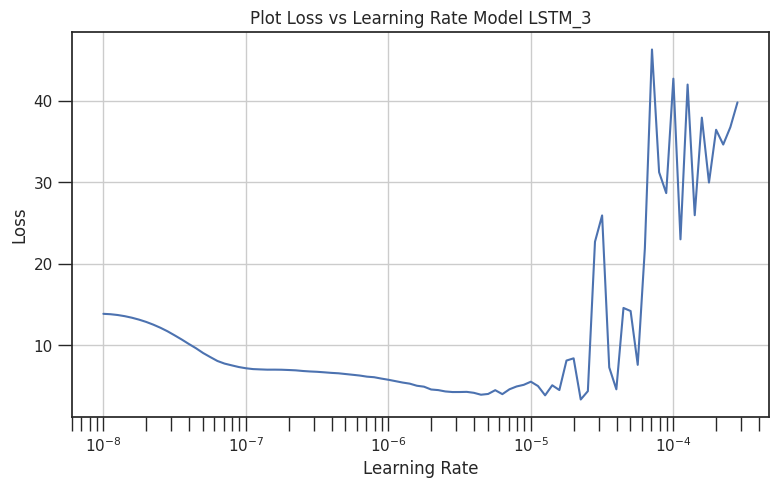

In [ ]:
# Pick optimal learning rate

# Set the figure size
plt.figure(figsize=(9, 5))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history_LSTM_3.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

plt.ylabel('Loss')
plt.xlabel('Learning Rate')
plt.title('Plot Loss vs Learning Rate Model LSTM_3')

### Training the Model

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
LSTM_3.set_weights(init_weights_LSTM_3)

In [ ]:
# Set the learning rate
lrs_LSTM_3 = 3.1623e-05

# Set the optimizer
optimizer_LSTM_3 = tf.keras.optimizers.SGD(learning_rate=lrs_LSTM_3, momentum=0.9)

# Set the training parameters
LSTM_3.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer_LSTM_3,
              metrics=["mae"])

# Train the model
history_LSTM_3 = LSTM_3.fit(dataset, epochs=500, validation_data=val_set, callbacks=[callbacks_LSTM])

Epoch 1/500
2/2 [==============================] - 8s 2s/step - loss: 18.6387 - mae: 19.1387 - val_loss: 7.4070 - val_mae: 7.9030
Epoch 2/500
2/2 [==============================] - 0s 44ms/step - loss: 23.1619 - mae: 23.6606 - val_loss: 60.2941 - val_mae: 60.7941
Epoch 3/500
2/2 [==============================] - 0s 44ms/step - loss: 21.1245 - mae: 21.6245 - val_loss: 6.2570 - val_mae: 6.7552
Epoch 4/500
2/2 [==============================] - 0s 45ms/step - loss: 23.8812 - mae: 24.3812 - val_loss: 56.0577 - val_mae: 56.5577
Epoch 5/500
2/2 [==============================] - 0s 43ms/step - loss: 22.8773 - mae: 23.3773 - val_loss: 9.9253 - val_mae: 10.4253
Epoch 6/500
2/2 [==============================] - 0s 43ms/step - loss: 24.3504 - mae: 24.8504 - val_loss: 13.3785 - val_mae: 13.8785
Epoch 7/500
2/2 [==============================] - 0s 47ms/step - loss: 10.6165 - mae: 11.0996 - val_loss: 17.2364 - val_mae: 17.7364
Epoch 8/500
2/2 [==============================] - 0s 48ms/step - los

### Model Prediction

In [ ]:
# Use helper function to generate predictions
forecast_LSTM_3 = forecast_LSTM(LSTM_3, forecast_series_LSTM, window_size, batch_size)

# Drop single dimensional axes
results_LSTM_3 = forecast_LSTM_3.squeeze()

1/1 [==============================] - 2s 2s/step


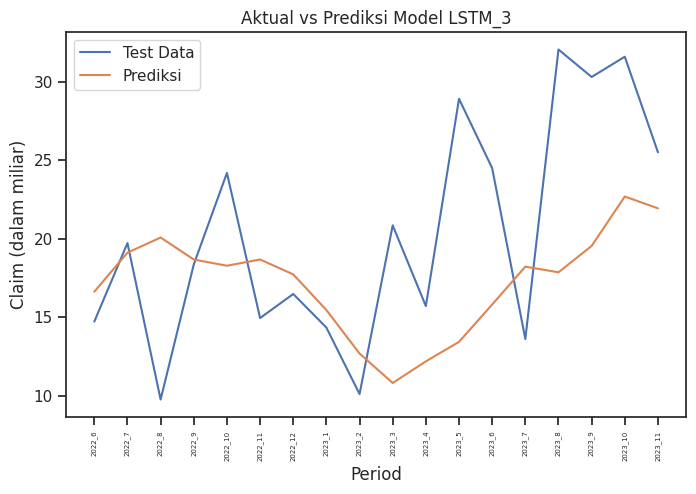

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(time_test, x_test, label = 'Test Data')
plt.plot(time_test,results_LSTM_3, label = 'Prediksi')
plt.title('Aktual vs Prediksi Model LSTM_3')
plt.xlabel('Period')
plt.ylabel('Claim (dalam miliar)')
plt.xticks(rotation=90,fontsize=5)
plt.legend()
plt.show()

### Evaluation Metrics

In [ ]:
print("Test MAPE: %.3f" % (tf.keras.metrics.mean_absolute_percentage_error(x_test, results_LSTM_3).numpy()*100))
print("Test MAE: %.3f" % tf.keras.metrics.mean_absolute_error(x_test, results_LSTM_3).numpy())
print("Test MSE: %.3f" % tf.keras.metrics.mean_squared_error(x_test, results_LSTM_3).numpy())
print("Test RMSE: %.3f" % np.sqrt(tf.keras.metrics.mean_squared_error(x_test, results_LSTM_3).numpy()))

Test MAPE: 2941.430
Test MAE: 5.973
Test MSE: 57.106
Test RMSE: 7.557


## 4 Hidden Layer

### Build The Model

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
LSTM_4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[window_size, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

# Print the model summary
LSTM_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 64)            256       
                                                                 
 lstm (LSTM)                 (None, 10, 64)            33024     
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 10, 64)            33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda (Lambda)             (None, 1)                 0

### Tune the Learning rate

In [ ]:
# Get initial weights
init_weights_LSTM_4 = LSTM_4.get_weights()

In [ ]:
# Initialize the optimizer
optimizer_ = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
LSTM_4.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer_)

# Train the model
history_LSTM_4 = LSTM_4.fit(dataset, epochs=90, callbacks=[lr_schedule])

Epoch 1/90
2/2 [==============================] - 10s 107ms/step - loss: 4.5281 - lr: 1.0000e-08
Epoch 2/90
2/2 [==============================] - 0s 24ms/step - loss: 4.5281 - lr: 1.1220e-08
Epoch 3/90
2/2 [==============================] - 0s 23ms/step - loss: 4.5281 - lr: 1.2589e-08
Epoch 4/90
2/2 [==============================] - 0s 24ms/step - loss: 4.5281 - lr: 1.4125e-08
Epoch 5/90
2/2 [==============================] - 0s 24ms/step - loss: 4.5280 - lr: 1.5849e-08
Epoch 6/90
2/2 [==============================] - 0s 24ms/step - loss: 4.5280 - lr: 1.7783e-08
Epoch 7/90
2/2 [==============================] - 0s 25ms/step - loss: 4.5281 - lr: 1.9953e-08
Epoch 8/90
2/2 [==============================] - 0s 26ms/step - loss: 4.5280 - lr: 2.2387e-08
Epoch 9/90
2/2 [==============================] - 0s 23ms/step - loss: 4.5281 - lr: 2.5119e-08
Epoch 10/90
2/2 [==============================] - 0s 24ms/step - loss: 4.5283 - lr: 2.8184e-08
Epoch 11/90
2/2 [==============================

Text(0.5, 1.0, 'Plot Loss vs Learning Rate Model LSTM_4')

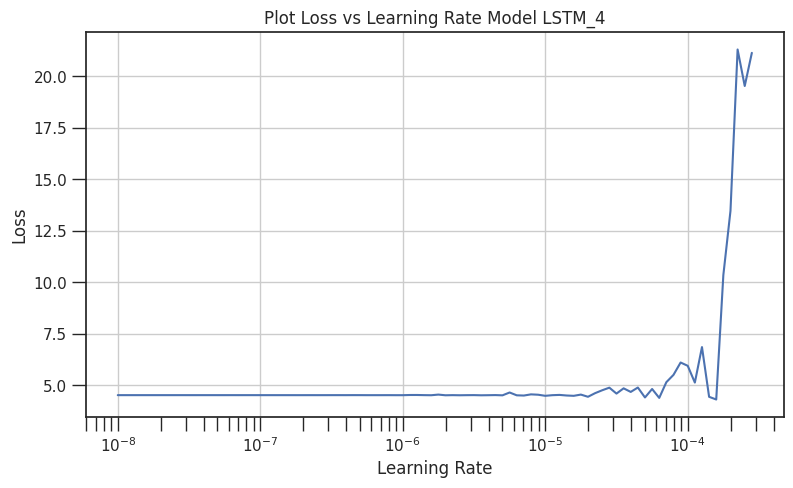

In [ ]:
# Pick optimal learning rate

# Set the figure size
plt.figure(figsize=(9, 5))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history_LSTM_4.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

plt.ylabel('Loss')
plt.xlabel('Learning Rate')
plt.title('Plot Loss vs Learning Rate Model LSTM_4')

### Training the Model

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
LSTM_4.set_weights(init_weights_LSTM_4)

In [ ]:
# Set the learning rate
lrs_LSTM_4 = 1.2589e-04

# Set the optimizer
optimizer_LSTM_4 = tf.keras.optimizers.SGD(learning_rate=lrs_LSTM_4, momentum=0.9)

# Set the training parameters
LSTM_4.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer_LSTM_4,
              metrics=["mae"])

# Train the model
history_LSTM_4 = LSTM_4.fit(dataset, epochs=500, validation_data=val_set, callbacks=[callbacks_LSTM])

Epoch 1/500
2/2 [==============================] - 16s 2s/step - loss: 24.5546 - mae: 25.0546 - val_loss: 35.2967 - val_mae: 35.7967
Epoch 2/500
2/2 [==============================] - 0s 49ms/step - loss: 26.8446 - mae: 27.3446 - val_loss: 36.2459 - val_mae: 36.7459
Epoch 3/500
2/2 [==============================] - 0s 49ms/step - loss: 17.3844 - mae: 17.8844 - val_loss: 9.5879 - val_mae: 10.0879
Epoch 4/500
2/2 [==============================] - 0s 50ms/step - loss: 20.6115 - mae: 21.1115 - val_loss: 18.6996 - val_mae: 19.1996
Epoch 5/500
2/2 [==============================] - 0s 53ms/step - loss: 8.6748 - mae: 9.1525 - val_loss: 13.2747 - val_mae: 13.7747
Epoch 6/500
2/2 [==============================] - 0s 52ms/step - loss: 6.3712 - mae: 6.8554 - val_loss: 10.7773 - val_mae: 11.2494
Epoch 7/500
2/2 [==============================] - 0s 50ms/step - loss: 8.6872 - mae: 9.1848 - val_loss: 22.6576 - val_mae: 23.1576
Epoch 8/500
2/2 [==============================] - 0s 51ms/step - loss

### Model Prediction

In [ ]:
# Use helper function to generate predictions
forecast_LSTM_4 = forecast_LSTM(LSTM_4, forecast_series_LSTM, window_size, batch_size)

# Drop single dimensional axes
results_LSTM_4 = forecast_LSTM_4.squeeze()

1/1 [==============================] - 2s 2s/step


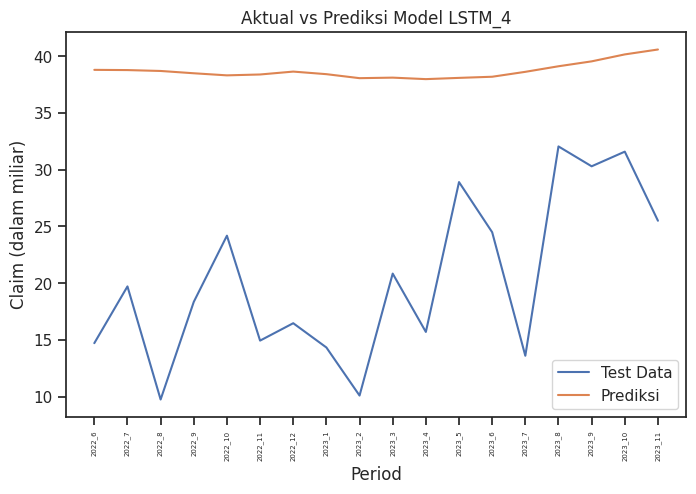

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(time_test, x_test, label = 'Test Data')
plt.plot(time_test,results_LSTM_4, label = 'Prediksi')
plt.title('Aktual vs Prediksi Model LSTM_4')
plt.xlabel('Period')
plt.ylabel('Claim (dalam miliar)')
plt.xticks(rotation=90,fontsize=5)
plt.legend()
plt.show()

### Evaluation Metrics

In [ ]:
print("Test MAPE: %.3f" % (tf.keras.metrics.mean_absolute_percentage_error(x_test, results_LSTM_4).numpy()*100))
print("Test MAE: %.3f" % tf.keras.metrics.mean_absolute_error(x_test, results_LSTM_4).numpy())
print("Test MSE: %.3f" % tf.keras.metrics.mean_squared_error(x_test, results_LSTM_4).numpy())
print("Test RMSE: %.3f" % np.sqrt(tf.keras.metrics.mean_squared_error(x_test, results_LSTM_4).numpy()))

Test MAPE: 11648.032
Test MAE: 18.411
Test MSE: 384.274
Test RMSE: 19.603


# The training MAE and LOSS plot

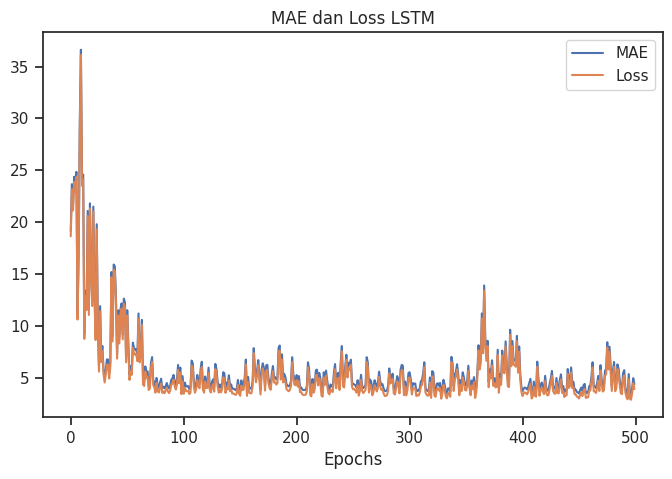

In [ ]:
# Get mae and loss from history log
# Model
history_LSTM = history_LSTM_3
mae_LSTM = history_LSTM.history['mae']
loss_LSTM = history_LSTM.history['loss']

# Get number of epochs
epochs_LSTM = range(len(loss_LSTM))

# Plot mae and loss
plt.figure(figsize=(8,5))
plt.plot(epochs_LSTM, mae_LSTM, label = 'MAE')
plt.plot(epochs_LSTM, loss_LSTM, label = 'Loss')
plt.title('MAE dan Loss LSTM')
plt.xlabel('Epochs')
plt.legend()
plt.show()

### Prediksi Nilai 7 Bulan ke Depan

In [ ]:
# Reduce the original series
initial_input_LSTM = x_new[split_time - window_size:]
initial_input_LSTM = initial_input_LSTM.to_numpy()

In [ ]:
# Memperoleh data terakhir sepanjang sepuluh nilai sebagai initial_input
initial_input_LSTM = initial_input_LSTM[len(initial_input_LSTM)-window_size:].reshape(1,10)
predictions_LSTM = []

for _ in range(7):
    next_pred_LSTM = LSTM_3.predict(initial_input_LSTM, verbose=0)
    predictions_LSTM.append(next_pred_LSTM)
    initial_input_LSTM = np.append(initial_input_LSTM[0:,1:], next_pred_LSTM).reshape(1,10)

pred_LSTM = np.append(results_LSTM_3, predictions_LSTM)

In [ ]:
print("Hasil prediksi 7 bulan ke depan: ", np.array(predictions_LSTM).squeeze())

Hasil prediksi 7 bulan ke depan:  [19.424263 16.596573 14.047083 11.929697  9.806413  7.948718  6.637193]


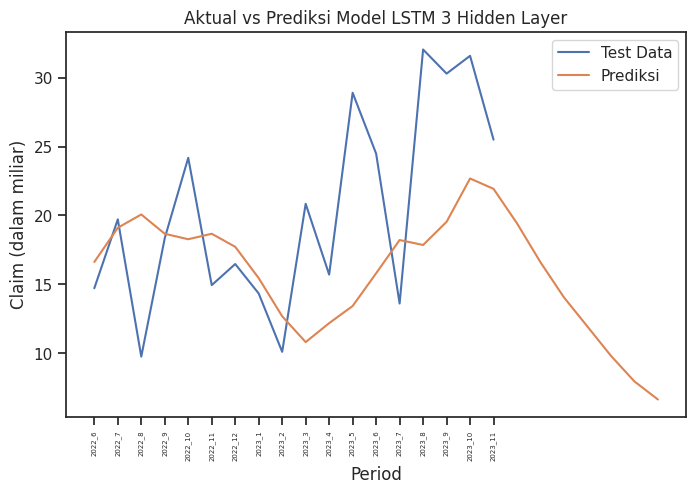

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(time_test, x_test, label = 'Test Data')
plt.plot(pred_LSTM, label = 'Prediksi')
plt.title('Aktual vs Prediksi Model LSTM 3 Hidden Layer')
plt.xlabel('Period')
plt.ylabel('Claim (dalam miliar)')
plt.xticks(rotation=90,fontsize=5)
plt.legend()
plt.show()